In [12]:
import re
from os import listdir
import networkx as nx
import numpy as np
import pandas as pd
import pickle

## Loading files to create network aftewards

- Defining path file
- Reviews file
- Customers dictionary
- Product dictionary

In [13]:
PATH_DATA = "../Files/"
df_no_text = pd.read_pickle("%sAmazonDataProjectNoText.pkl" % PATH_DATA)

In [14]:
with open('%scustomersDict.pickle' %PATH_DATA, 'rb') as handleC:
    customersDict = pickle.load(handleC)

In [15]:
with open('%sproductsDict.pickle' %PATH_DATA, 'rb') as handleP:
    productsDict = pickle.load(handleP)

## Customers-Products network 

### Network creation
- Loading reviews file
- Customers-Products bipartite network creation
- Writing pickle file to store the Customers-Products network

In [9]:
gCP = nx.Graph()

In [10]:
for index, row in df_no_text.iterrows():
    gCP.add_node(row.customer_id, isCust = True)
    gCP.add_node(row.product_id, isCust = False, title = row.product_title, cat = row.product_category)
    gCP.add_edge(row.customer_id, row.product_id, weight = row.star_rating, verify = row.verified_purchase, date = row.review_date, id_rew = index)

In [ ]:
nx.write_gpickle(gCP, "%srawNetworg.gpickle" %PATH_DATA)

Loading the network from pickle file

In [16]:
gCP = nx.read_gpickle("%srawNetworg.gpickle" %PATH_DATA)

### First Customers-Products analysis 
- Nodes number
- Edges number

In [17]:
print("The number of nodes is: %d" %(len(gCP.nodes())))
print("The number of edges is: %d" %(len(gCP.edges())))

The number of nodes is: 994498
The number of edges is: 1704565


## Customers network 

### Network creation
- Network computation
- Writing pickle file to store the network

In [ ]:
gC = nx.projected_graph(gCP, list(df_no_text.product_id))

In [49]:
print(len(productsDict.items()))
count = 1

58618


In [50]:
for p in productsDict.items():
    print("%d/58618" %(count))
    count += 1
    if len(p[1]) == 1:
        gC.add_node(p[1][0])
    else:
        for i in range(len(p[1]) - 1):
            for j in range(i+1, len(p[1])):
                if gC.has_edge(p[1][i], p[1][j]):
                    gC[p[1][i]][p[1][j]]["weight"] += 1.0 / (1 + abs(df[df.index == p[1][i][1]].star_rating.item() - df[df.index == p[1][j][1]].star_rating.item()))
                else:
                    gC.add_edge(p[1][i], p[1][j], weight = 1.0 / (1 + abs(df[df.index == p[1][i][1]].star_rating.item() - df[df.index == p[1][j][1]].star_rating.item())))

1/58618
2/58618
3/58618
4/58618
5/58618
6/58618
7/58618
8/58618
9/58618


KeyboardInterrupt: 

In [40]:
print(gC.nodes())

(2, 'due')


## Products network 

### Network creation
- Network computation
- Writing pickle file to store the network

In [40]:
gP = nx.Graph()

In [ ]:
for p in poroductsDict:
    gP.add_node(p, title = p.product_title, cat = p.product_category)

In [15]:
customerNOfOrder = dict()
for key, value in customersDict.items():
    customerNOfOrder[len(value)] = customerNOfOrder.get(len(value), 0) + 1

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

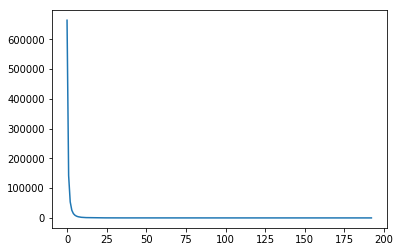

In [17]:
plt.plot(customerNOfOrder.values())
plt.show()

In [18]:
prec = 0
cumulative = list()
totOrders = 0.0
for key, value in customerNOfOrder.items():
    cumulative.append(value + prec)
    prec += value
    totOrders += value
cumulative = [value / totOrders for value in cumulative]

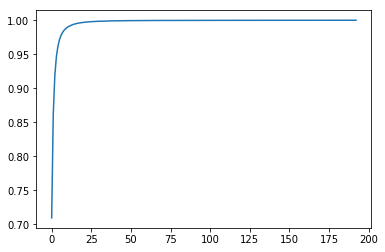

In [19]:
plt.plot(cumulative)
plt.show()